# Plotting data with matplotlib

Plotting of data is pandas is handled by an external Python module called *matplotlib*. Like pandas it is a large library and has a venerable history (first released in 2003) and so we couldn't hope to cover all its functionality in this course. To see the wide range of possibilities you have with matplotlib see its [example gallery](http://matplotlib.org/gallery.html).

Here we will cover the basic uses of it, particularly focusing on its integration with pandas.

First we import pandas in the same way as we did previously.

In [1]:
import pandas as pd
from pandas import Series, DataFrame

Some matplotlib functionality is provided directly through pandas (such as the `plot()` metho as we will see) but for much of it you need to import the matplotlib interface itself.

The most common interface to matplotlib is its `pyplot` module which provides a way to affect the current state of matplotlib directly. [By convention](http://matplotlib.org/faq/usage_faq.html#coding-styles) this is imported as `plt`.

In [2]:
import matplotlib.pyplot as plt

Once we have imported matplotlib we can stall callng its functions. Any functions called on the `plt` object will affect all of matplotlib from that point on in the script. So, for example we might want to set the style with which matplotlib draws its graphs to be something a bit prettier than the default so we call `plt.style.use()` and give it the names of the style we want:

In [3]:
plt.style.use('ggplot')

We then need to import some data to plot. Let's start with the data from the last exercise and import it into a `DataFrame`:

In [4]:
df = pd.read_csv(
    'cetml1659on.dat',  # file name
    skiprows=6,  # skip header
    sep='\s+',  # whitespace separated
    na_values=['-99.9', '-99.99'],  # NaNs
)
df.head()

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,YEAR
1659,3.0,4.0,6.0,7.0,11.0,13.0,16.0,16.0,13.0,10.0,5.0,2.0,8.87
1660,0.0,4.0,6.0,9.0,11.0,14.0,15.0,16.0,13.0,10.0,6.0,5.0,9.10
1661,5.0,5.0,6.0,8.0,11.0,14.0,15.0,15.0,13.0,11.0,8.0,6.0,9.78
1662,5.0,6.0,6.0,8.0,11.0,15.0,15.0,15.0,13.0,11.0,6.0,3.0,9.52
1663,1.0,1.0,5.0,7.0,10.0,14.0,15.0,15.0,13.0,10.0,7.0,5.0,8.63


The 

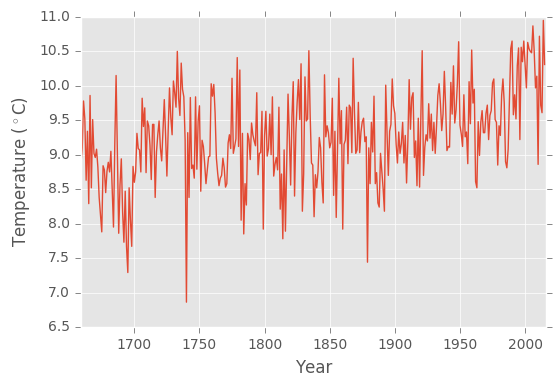

In [5]:
df['YEAR'].plot()

plt.xlabel('Year')
plt.ylabel(r'Temperature ($^\circ$C)')

plt.show()

Continue to the [next section](numerical operations.ipynb).